In [2]:
%matplotlib inline
import pandas as pd

In [3]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Englishman in L.A: The Movie,2017
1,Dong fang wu shen,1985
2,Duma o Kovpake: Nabat,1974
3,Royal Shakespeare Company: The Merchant of Venice,2015
4,First Lady,1937


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [26]:
c = cast[(cast['character'] == 'Superman')|(cast['character']=='Batman')] 
#filter df to only include films with batman or superman character first

c = c.groupby(['year', 'character']).size() 
#for each year, I want to know how many batmans vs supermans there were

c

# c = c.unstack('character') 
# # we need to unstack this data vertical data horizontally so we can compare batman year 1 vs superman year 1 etc,
# # we include 1 inside the parenthesis because we want to unstack the data on th

# c = c.fillna(0) # replace the missing numbers with zeros

# c = c[c['Superman']>c['Batman']] #subset data to only show data where superman>batman

# print(f'Superman Years: {len(c)}')

year  character
1938  Batman        1
1940  Batman        1
1943  Batman        1
1948  Superman      1
1949  Batman        2
1950  Superman      1
1951  Superman      2
1953  Batman        2
1954  Superman      5
1955  Superman      1
1957  Batman        2
1965  Batman        1
1966  Batman        1
1967  Batman        1
1973  Batman        1
      Superman      2
1978  Superman      2
1980  Superman      2
1981  Batman        1
      Superman      1
1983  Superman      2
1985  Batman        2
      Superman      2
1987  Superman      1
1988  Batman        1
1989  Batman        1
1991  Batman        1
      Superman      1
1992  Batman        1
      Superman      1
                   ..
1999  Batman        1
2002  Batman        1
      Superman      1
2003  Batman        1
      Superman      1
2004  Batman        1
2005  Batman        1
2006  Superman      1
2008  Batman        3
      Superman      2
2009  Batman        3
      Superman      1
2010  Batman        3
      Superman  

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [170]:
c = cast[(cast['character'] == 'Superman')|(cast['character']=='Batman')] 

c = c.groupby(['year', 'character']).size()
c = c.unstack(1) 
c = c.fillna(0)

c = c[c['Batman']>c['Superman']]

print(f'Batman Years: {len(c)}')

Batman Years: 27


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

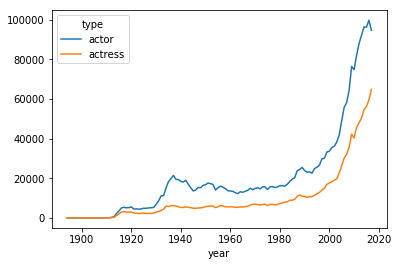

In [172]:
c = cast.groupby(['year','type']).size()

c = c.unstack(1)

c = c.fillna(0)

c[:115].plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

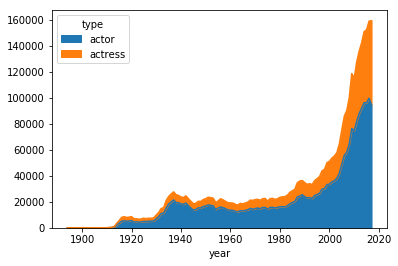

In [99]:
c = cast.groupby(['year','type']).size()

c = c.unstack()

c = c.fillna(0)

c[:115].plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

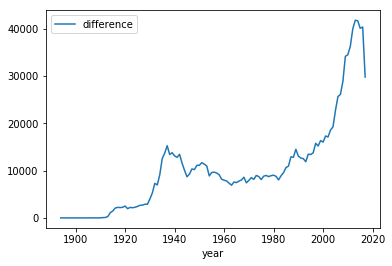

In [103]:
c['difference'] = c['actor'] - c['actress']
c[:115].plot(y='difference')

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

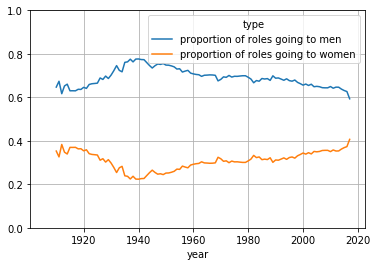

In [122]:
c['proportion of roles going to men'] = c['actor']/(c['actor']+c['actress'])
c['proportion of roles going to women'] = c['actress']/(c['actor']+c['actress'])

c[1:115].plot(y=['proportion of roles going to men','proportion of roles going to women' ], ylim=[0,1], grid=True)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

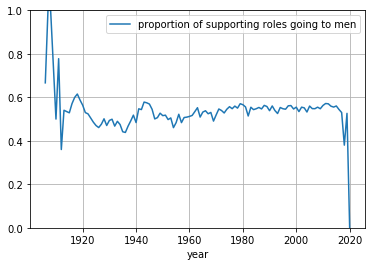

In [140]:
c = cast[cast['n'] == 2]

c=c.groupby(['year','type']).size()

c = c.unstack()

c = c.fillna(0)

c['proportion of supporting roles going to men'] = c['actor']/(c['actor']+c['actress'])
c.plot(y='proportion of supporting roles going to men', ylim=[0,1], grid=True)


### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

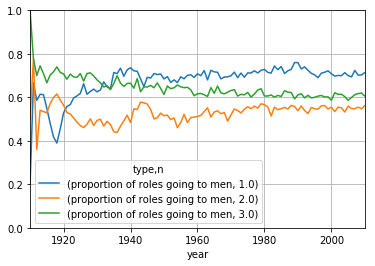

In [190]:
c = cast[cast['n'] <= 3]


c = c.groupby(['year','n', 'type']).size()

c = c.unstack(2).fillna(0)

c['proportion of roles going to men'] = c['actor']/(c['actor']+c['actress'])

c = c.unstack(1)

c.plot(y=['proportion of roles going to men'], ylim=[0,1], grid=True, xlim=[1910,2010])